# **TikTok Claims Classification Project: Clean and Prepare Dataset**

<img src="../Images/bubble_logo.png" alt="Logo" style="float:left; width:120px; height:120px;">

## **Introduction**

The goal of this notebook is to clean and prepare the TikTok dataset for machine learning modelling. This involves addressing data quality issues such as missing values, feature engineering, transforming categorical variables, and ensuring the dataset is structured appropriately for analysis. By the end of this process, the dataset will be ready for model-building in subsequent notebooks. This notebook serves as the foundation for all future steps in this stage of the project, ensuring consistency and efficiency across workflows.

## **Contents**

#### **Setup and Data Initionalization**
1. Import Libraries and Packages
2. Import Dataset

#### **Data Validation, Cleaning, and Pre-Model Preparation**
3. Data Validation
4. Data Cleaning
5. Begin Model Assessment and Preparation
6. Feature Engineering
7. Export Cleaned Dataset

<br>

# **Setup and Data Initionalization**
## **1. Import Libraries and Packages**

**Import** necessary libraries for data manipulation, visualization, and modelling.

In [49]:
# Import packages for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

## **2. Import Dataset**

**Load** the dataset into a DataFrame for exploration and analysis.

In [50]:
# Read in dataset
data = pd.read_csv(r'C:\Users\danet\Documents\tiktok_dataset.csv')

<br>

# **Data Validation, Cleaning, and Pre-Model Preparation**
## **3. Data Validation**

**Inspect** first few rows

In [51]:
data.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0


<br>

**View** basic information about the data

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


<br>

**Generate** descriptive statistics

In [53]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


<br>

## **4. Data Cleaning**
**Ensure** data quality by addressing missing values, duplicates, and outliers.

#### **Handling Missing Values** 


In [54]:
# Check for missing values
missing = data.isnull().sum()
percentage = missing / len(data) * 100
missing_df = pd.DataFrame({
    'missing': missing,
    'percentage': percentage.round(2).astype(str) + '%'
})
missing_df

,missing,percentage
#,0,0.0%
claim_status,298,1.54%
video_id,0,0.0%
video_duration_sec,0,0.0%
video_transcription_text,298,1.54%
verified_status,0,0.0%
author_ban_status,0,0.0%
video_view_count,298,1.54%
video_like_count,298,1.54%
video_share_count,298,1.54%


***Note:*** As established in the previous EDA, there are missing values across the same 7 columns in 298 rows. Since dropping these rows only reduces the dataset by 1.54%, which is a minimal loss, I will proceed to drop them now to maintain the integrity of the analysis.

In [55]:
# Drop rows with missing values
data_cleaned = data.dropna().reset_index(drop=True)

In [56]:
# Confirm changes
data_cleaned.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

**All** missing values have now been dropped leaving **19,084** rows of data.

<br>

#### **Check for and Handle Duplicates**

In [57]:
# Check for duplicate rows
data_cleaned.duplicated().sum()

np.int64(0)

***Note:*** Zero duplicates observed.  No action required.

<br>

#### **Handling Outliers**

**Tree-Based** machine learning models are usually quite robust to outliers so the outliers observed in previous stages can be left as is.

<br>

## **5. Begin Model Assessment and Preparation**

#### **Assess Class Imbalance**

**Prepare** data for modelling by ensuring balanced classes.

In [58]:
# Check class balance
values = data_cleaned['claim_status'].value_counts()
distribution = values / values.sum() * 100
balance_df = pd.DataFrame({
    'claim_status': values,
    'balance': distribution.round(2).astype(str) + "%"
})
balance_df

,claim_status,balance
claim_status,,
claim,9608,50.35%
opinion,9476,49.65%


***Note:*** The target variable is well-balanced, with **50.35% classified as claims** and **49.65% as opinions**, ensuring that the model has an equal opportunity to learn and predict both classes effectively.

<br>

## **6. Feature Engineering**

#### **Transform `video_transcription_text`**

**Extract** the length of each `video_transcription_text` and add it as a new column in the DataFrame to use as a potential feature for the model.

In [59]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_cleaned['text_length'] = data_cleaned['video_transcription_text'].str.len()
data_cleaned[['text_length', 'video_transcription_text']].head()

,text_length,video_transcription_text
0,97,someone shared with me that drone deliveries a...
1,107,someone shared with me that there are more mic...
2,137,someone shared with me that american industria...
3,131,someone shared with me that the metro of st. p...
4,128,someone shared with me that the number of busi...


In [60]:
# Calculate the average text_length for claims and opinions
avg_claim_text_length = data_cleaned.groupby('claim_status')['text_length'].mean()
avg_claim_text_length

claim_status
claim      95.376978
opinion    82.722562
Name: text_length, dtype: float64

***Note:*** **Claim (95.38)** has a higher average text_length than **opinions (82.72)**

<br>

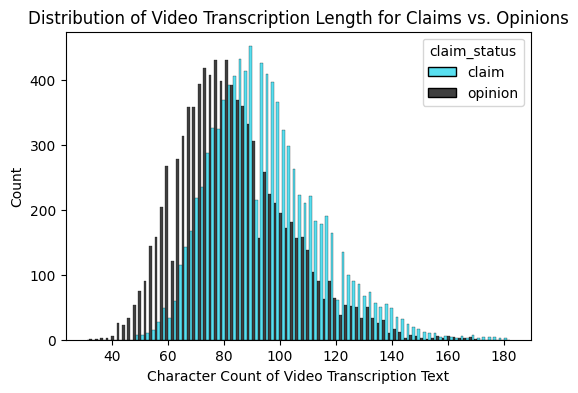

In [61]:
# Visualize the distribution of `text_length` for claims and opinions
plt.figure(figsize=(6,4))
tiktok_colours = ["#20D5EC", "#000000"]
sns.histplot(data=data_cleaned, stat="count", multiple="dodge", x="text_length", kde=False, palette=tiktok_colours, 
             hue="claim_status", element="bars", legend=True)
plt.xlabel("Character Count of Video Transcription Text")
plt.ylabel("Count")
plt.title("Distribution of Video Transcription Length for Claims vs. Opinions")
plt.show()

***Note:*** The histogram reveals a subtle difference in the distribution of transcription text length between claims and opinions.

* Claims tend to have slightly longer transcription lengths, with a peak around 90-100 characters.
* Opinions are more concentrated in the 70-80 character range.
* The overlap between the distributions indicates that text length alone is not a definitive distinguishing factor but could still provide moderate predictive power when combined with other features.

**Business Takeaway:**  
Text length offers limited but meaningful differentiation between claims and opinions. It can serve as a supporting feature in the model, especially when used alongside more impactful features like engagement metrics.

<br>

**Encode** target and categorical variables.

In [62]:
# Encode target variable
pd.set_option('future.no_silent_downcasting', True)
data_cleaned['claim_status'] = data_cleaned['claim_status'].replace({'opinion': 0, 'claim': 1}).astype(int)

In [63]:
# Dummy encode remaining categorical values
data_cleaned = pd.get_dummies(data_cleaned, 
                  columns=['verified_status', 'author_ban_status'],
                  drop_first=True)

<br>

**Remove** all unecessary columns and view final dataset.

In [64]:
# Drop unnecessary columns
data_cleaned = data_cleaned.drop(['#', 'video_id'], axis=1)

# View cleaned and prepared dataset
data_cleaned.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [66]:
# Review basic information about the data
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   claim_status                    19084 non-null  int64  
 1   video_duration_sec              19084 non-null  int64  
 2   video_transcription_text        19084 non-null  object 
 3   video_view_count                19084 non-null  float64
 4   video_like_count                19084 non-null  float64
 5   video_share_count               19084 non-null  float64
 6   video_download_count            19084 non-null  float64
 7   video_comment_count             19084 non-null  float64
 8   text_length                     19084 non-null  int64  
 9   verified_status_verified        19084 non-null  bool   
 10  author_ban_status_banned        19084 non-null  bool   
 11  author_ban_status_under review  19084 non-null  bool   
dtypes: bool(3), float64(5), int64(3)

***Note:*** Both target variables and predictive feature data types are ready for model creation except for `video_transcription_text`.  I have kept that feature for now as I have something planned for that column in subsequent notebooks.

<br>

## **7. Export Cleaned Dataset**

In [67]:
# Export the cleaned dataset to a CSV file
data_cleaned.to_csv("cleaned_tiktok_dataset.csv", index=False)

#### **Final Note**

This notebook successfully establishes a clean and well-structured dataset, ready for model-building in subsequent steps of the project. By addressing data quality issues, feature engineering, and pre-model preparation, it lays a solid foundation to ensure consistency, accuracy, and efficiency across all future workflows.